In [1]:
import os
import numpy as np
import scipy.io
import scipy.misc
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Define functions

In [11]:
def conv_layer(x, weights, bias):
    conv = tf.nn.conv2d(x, tf.constant(weights), strides=[1, 1, 1, 1], padding='SAME')
    return tf.nn.bias_add(conv, bias)

def pool_layer(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
            padding='SAME')

def preprocess(image, mean_pixel):
    return image - mean_pixel

def unprocess(image, mean_pixel):
    return image + mean_pixel

def imread(path):
    return scipy.misc.imread(path).astype(np.float)

def imsave(path, image):
    image = np.clip(image, 0, 255).astype(np.uint8)
    scipy.misc.imsave(path, image)
    
print ("Functions for VGG ready")

Functions for VGG ready


# Path and image

In [12]:
VGG_PATH = 'pre-trained-model/imagenet-vgg-verydeep-19.mat'
IMG_PATH = 'images/dog.jpg'
input_image = imread(IMG_PATH)
input_image_shape = (1,) + input_image.shape #[h, w, nch] -> [1, h, w, nch] 

C:\Users\StrikeWade\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


# Define VGG network

In [13]:
def vgg_net(data_path, input_image):
    layers = (
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1',
        'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',
        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3',
        'relu3_3', 'conv3_4', 'relu3_4', 'pool3',
        'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3',
        'relu4_3', 'conv4_4', 'relu4_4', 'pool4',
        'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3',
        'relu5_3', 'conv5_4', 'relu5_4'
    )
    
    data = scipy.io.loadmat(data_path)
    mean = data['normalization'][0][0][0]
    mean_pixel = np.mean(mean, axis=(0, 1))
    weights = data['layers'][0]
    net = {}
    current_image = input_image
    
    for i, name in enumerate(layers):
        kind = name[:4]
        if kind == 'conv':
            kernels, bias = weights[i][0][0][0][0]
            # matconvnet: weights are [width, height, in_channels, out_channels]
            # tensorflow: weights are [height, width, in_channels, out_channels]
            kernels = np.transpose(kernels, (1, 0, 2, 3))
            bias = bias.reshape(-1)
            current_image = conv_layer(current_image, kernels, bias)
            
        elif kind == 'relu':
            current_image = tf.nn.relu(current_image)
            
        elif kind == 'pool':
            current_image = pool_layer(current_image)
            
        net[name] = current_image
        
    assert len(net) == len(layers)
    
    return net, mean_pixel, layers
print ("Network for VGG ready")

Network for VGG ready


# Training

[1/36] conv1_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 851, 1280, 64)


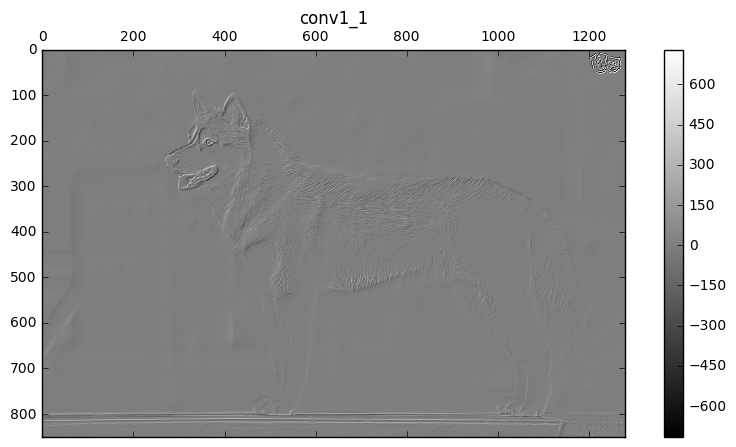

[2/36] relu1_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 851, 1280, 64)


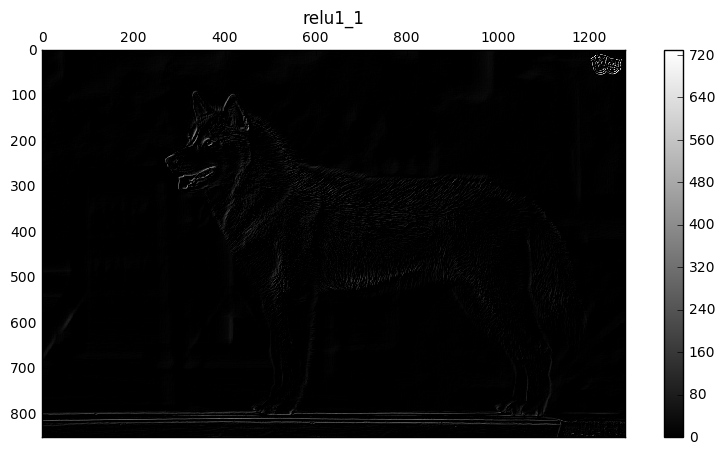

[3/36] conv1_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 851, 1280, 64)


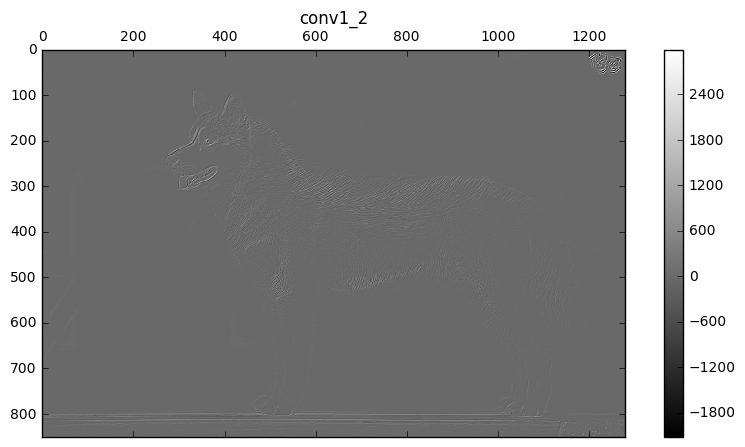

[4/36] relu1_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 851, 1280, 64)


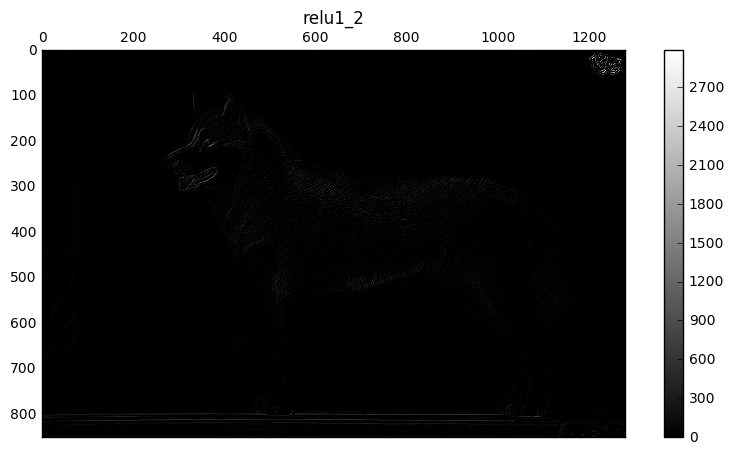

[5/36] pool1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 426, 640, 64)


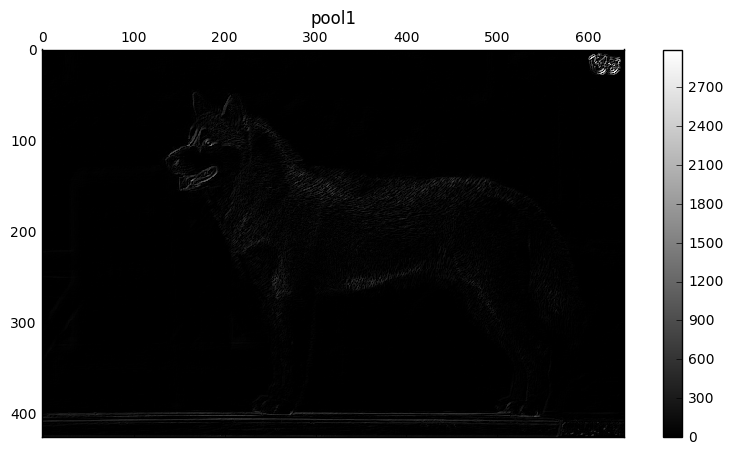

[6/36] conv2_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 426, 640, 128)


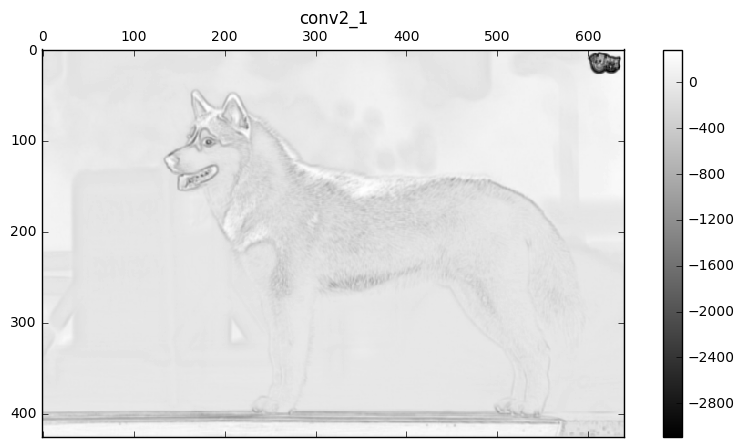

[7/36] relu2_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 426, 640, 128)


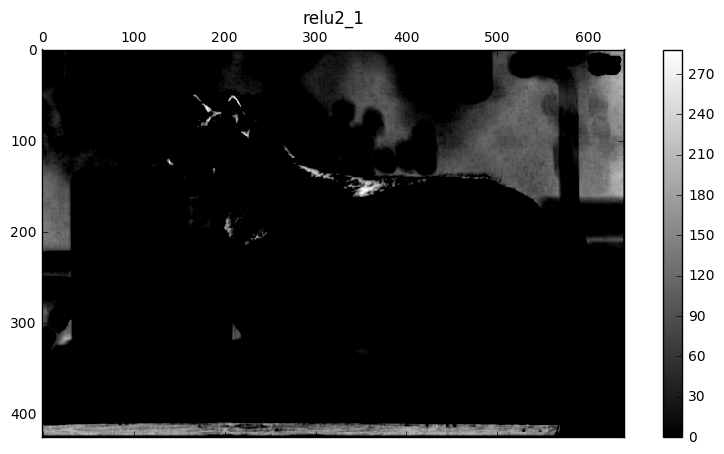

[8/36] conv2_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 426, 640, 128)


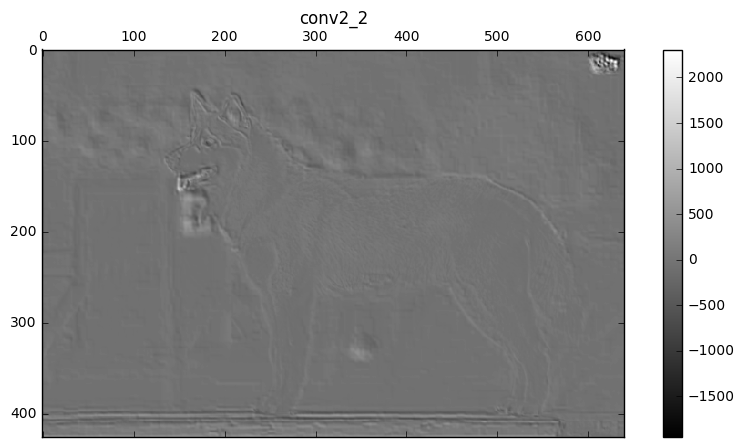

[9/36] relu2_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 426, 640, 128)


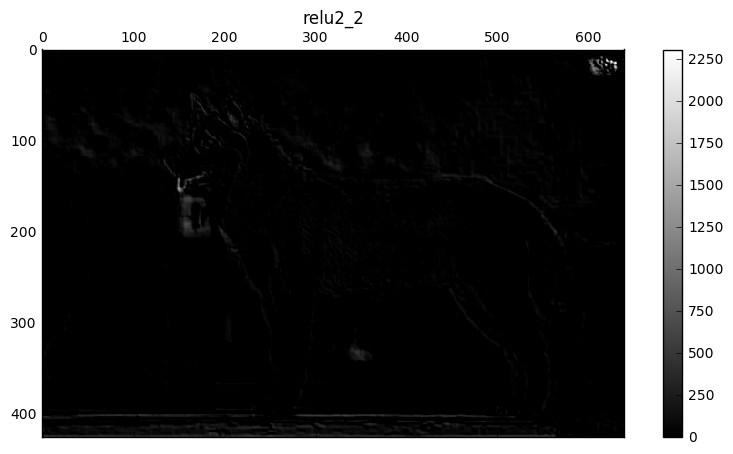

[10/36] pool2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 213, 320, 128)


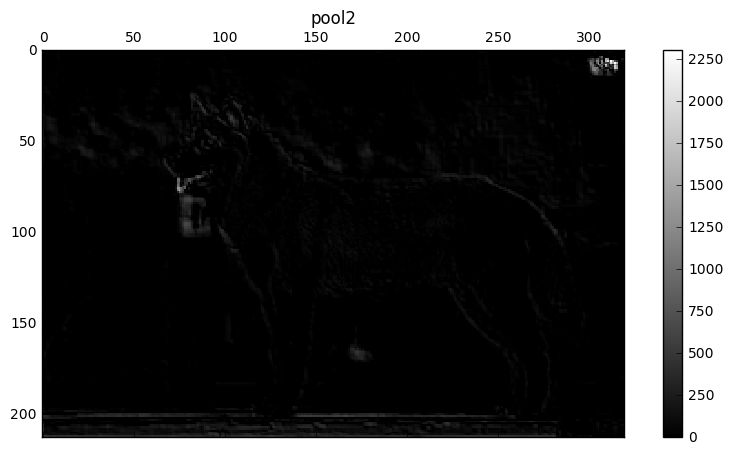

[11/36] conv3_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 213, 320, 256)


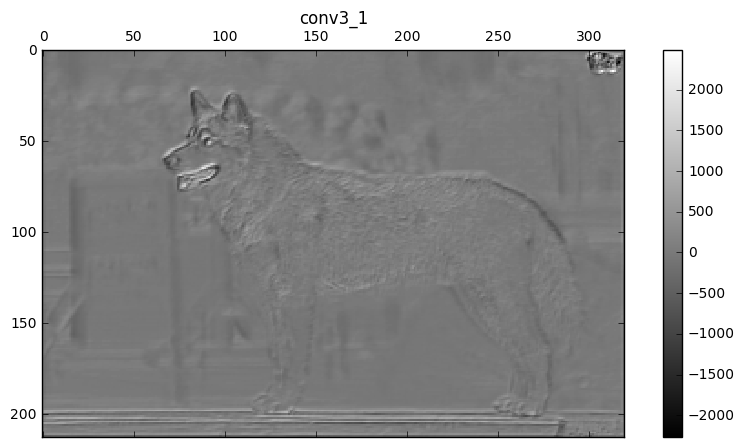

[12/36] relu3_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 213, 320, 256)


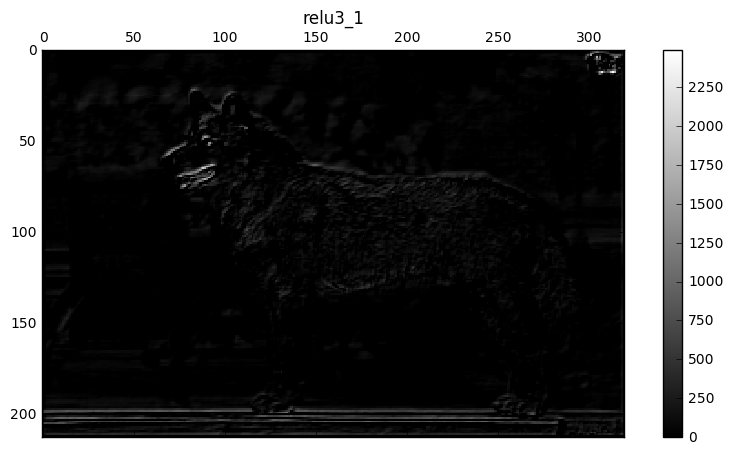

[13/36] conv3_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 213, 320, 256)


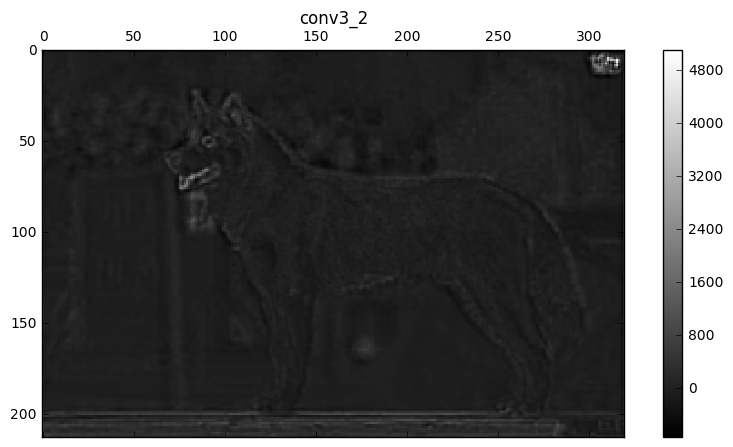

[14/36] relu3_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 213, 320, 256)


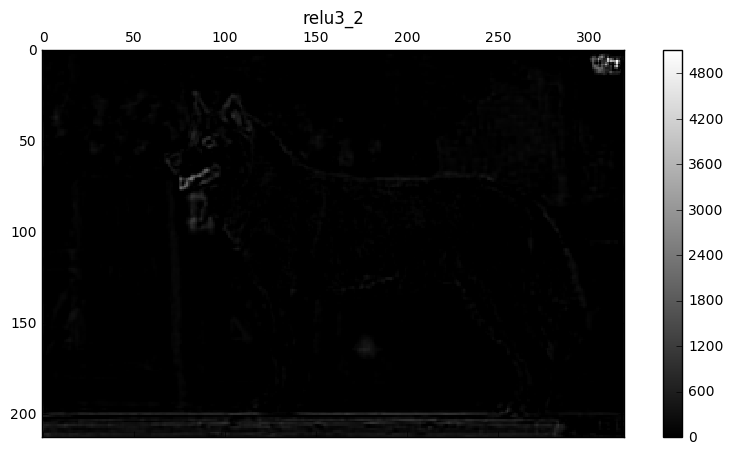

[15/36] conv3_3
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 213, 320, 256)


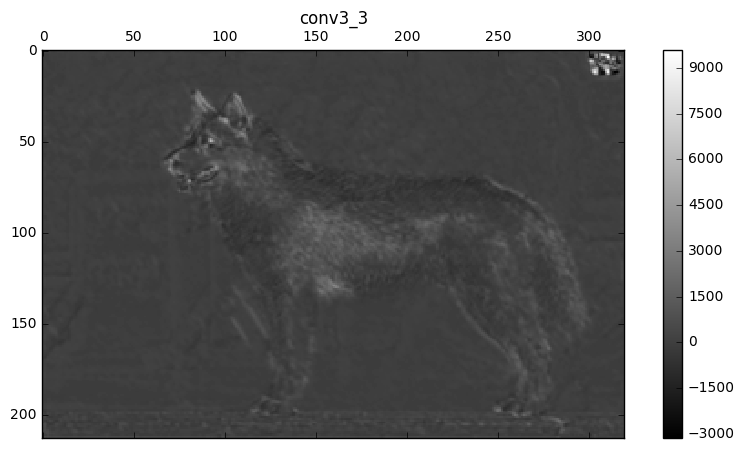

[16/36] relu3_3
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 213, 320, 256)


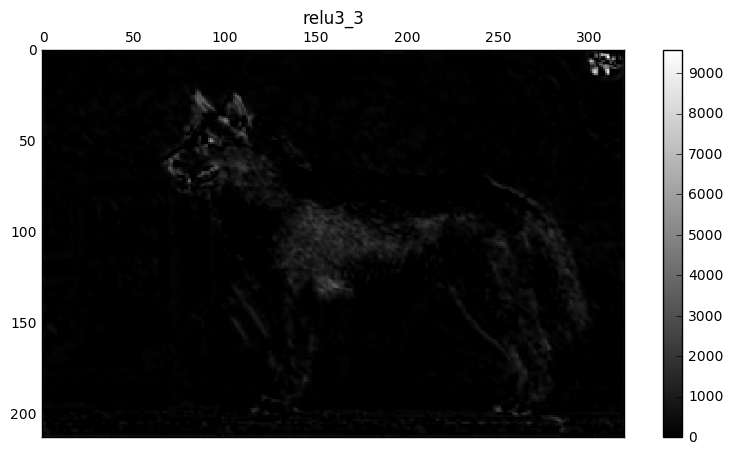

[17/36] conv3_4
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 213, 320, 256)


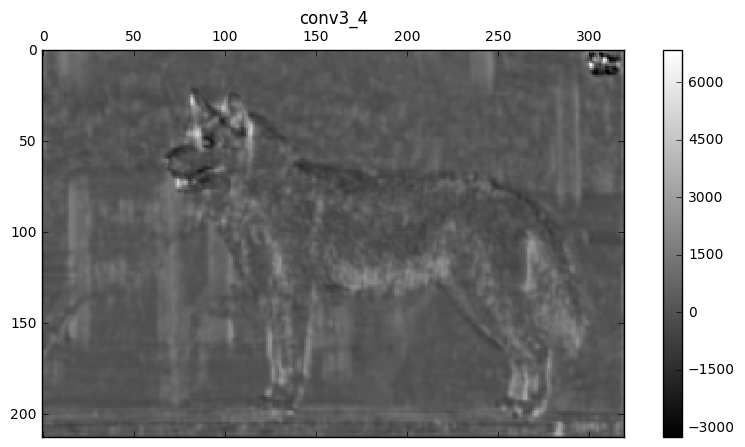

[18/36] relu3_4
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 213, 320, 256)


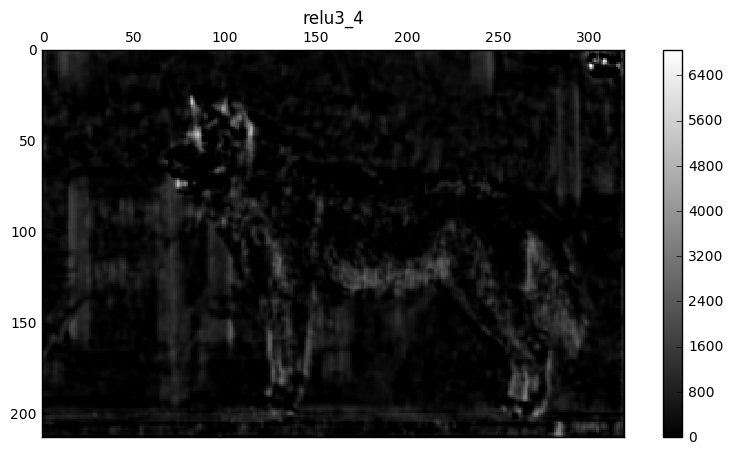

[19/36] pool3
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 107, 160, 256)


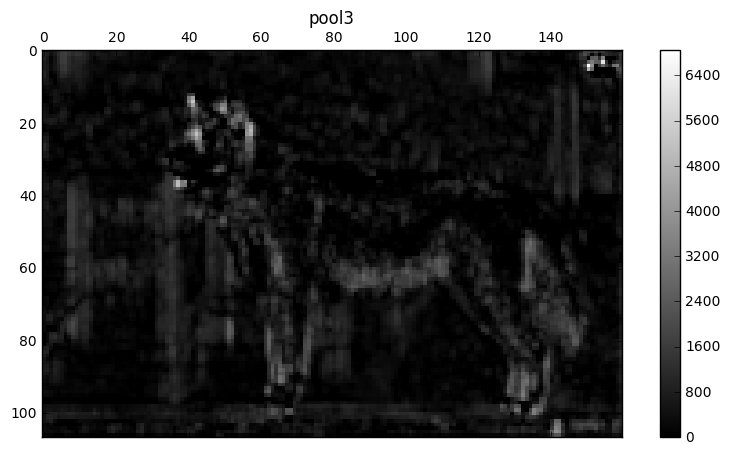

[20/36] conv4_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 107, 160, 512)


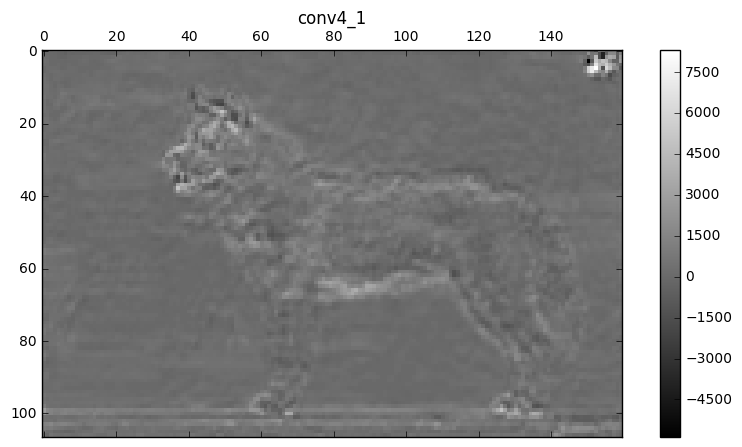

[21/36] relu4_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 107, 160, 512)


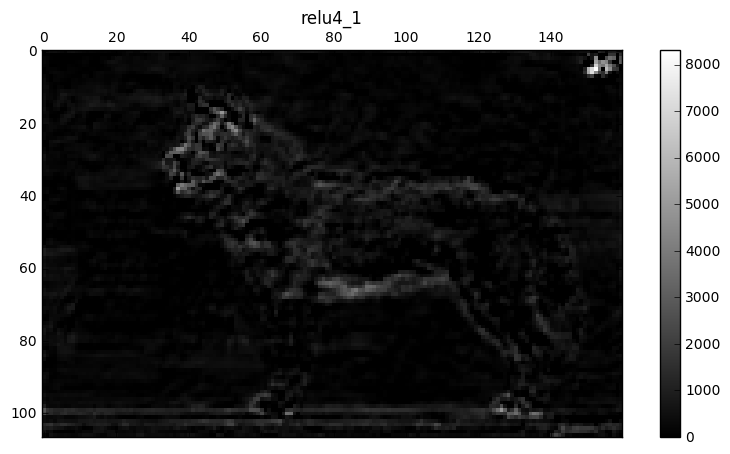

[22/36] conv4_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 107, 160, 512)


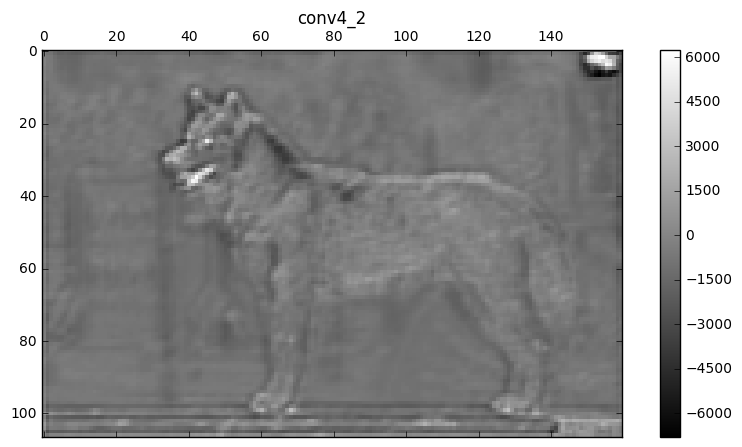

[23/36] relu4_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 107, 160, 512)


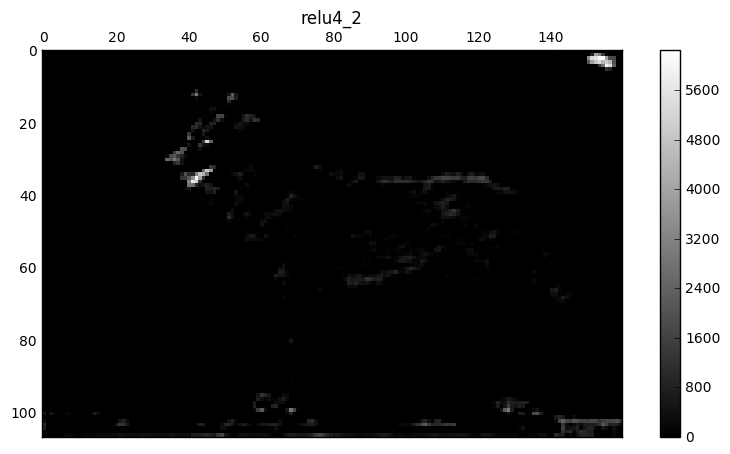

[24/36] conv4_3
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 107, 160, 512)


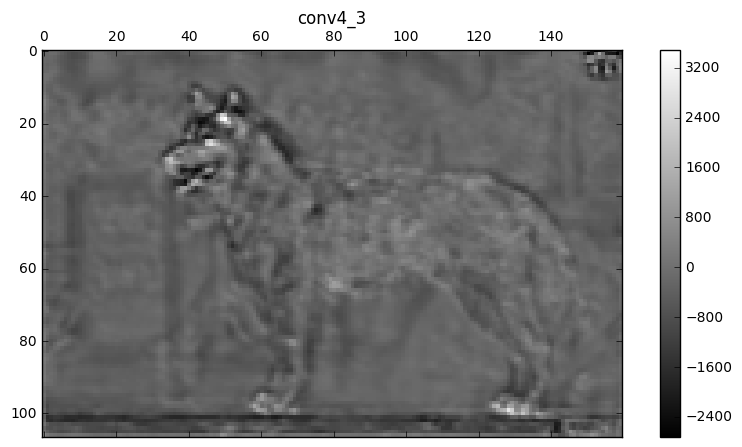

[25/36] relu4_3
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 107, 160, 512)


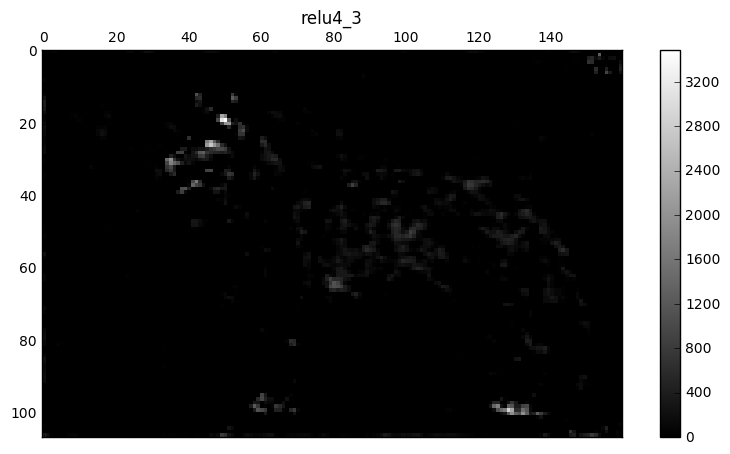

[26/36] conv4_4
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 107, 160, 512)


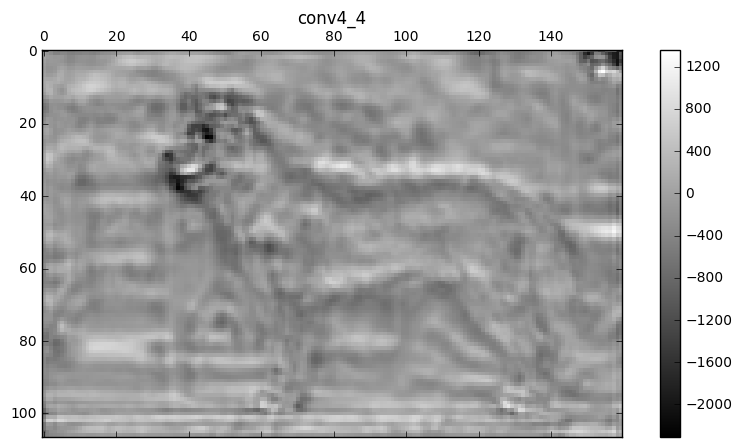

[27/36] relu4_4
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 107, 160, 512)


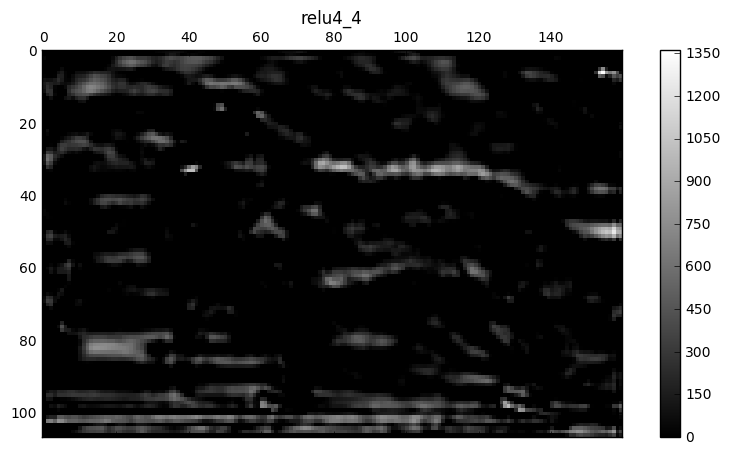

[28/36] pool4
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 54, 80, 512)


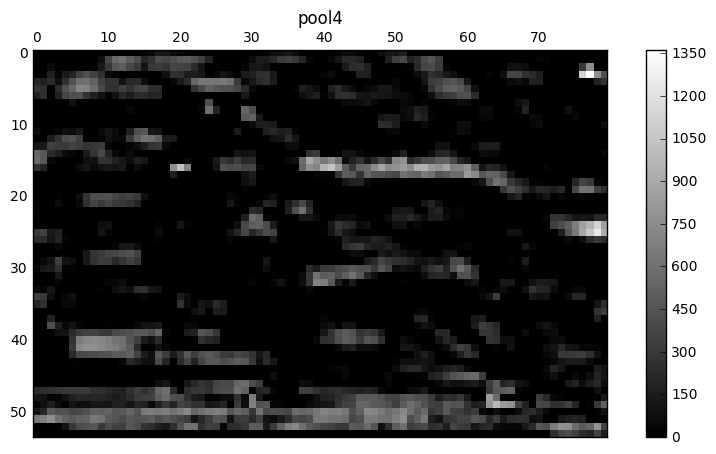

[29/36] conv5_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 54, 80, 512)


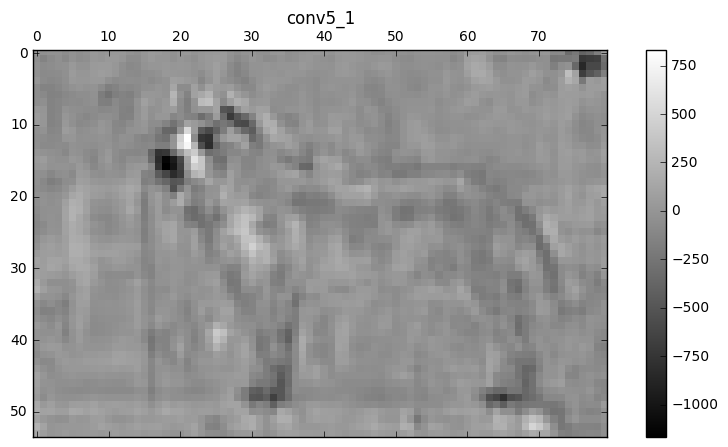

[30/36] relu5_1
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 54, 80, 512)


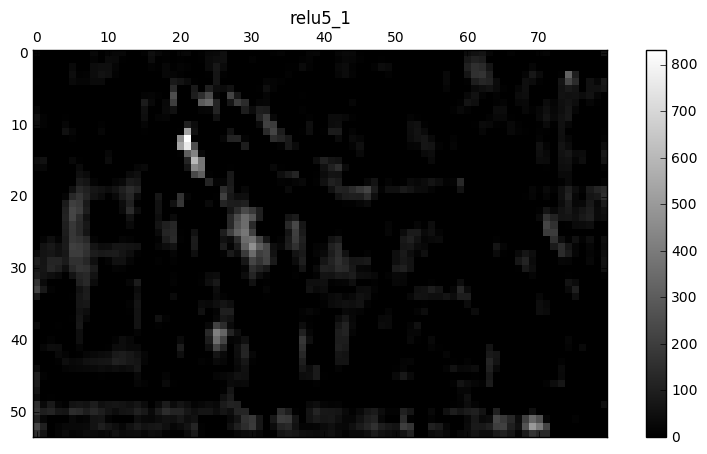

[31/36] conv5_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 54, 80, 512)


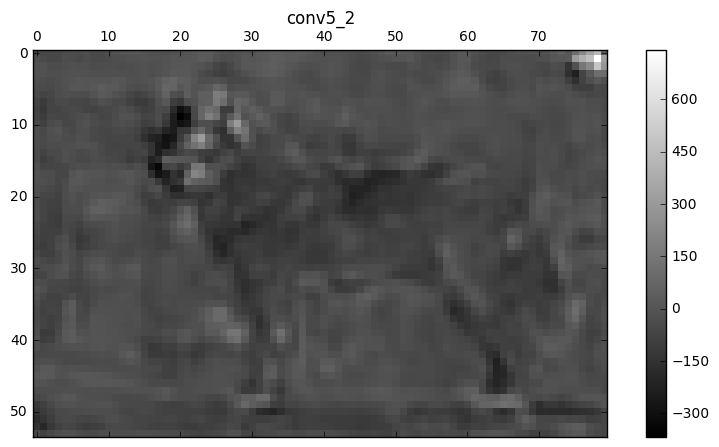

[32/36] relu5_2
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 54, 80, 512)


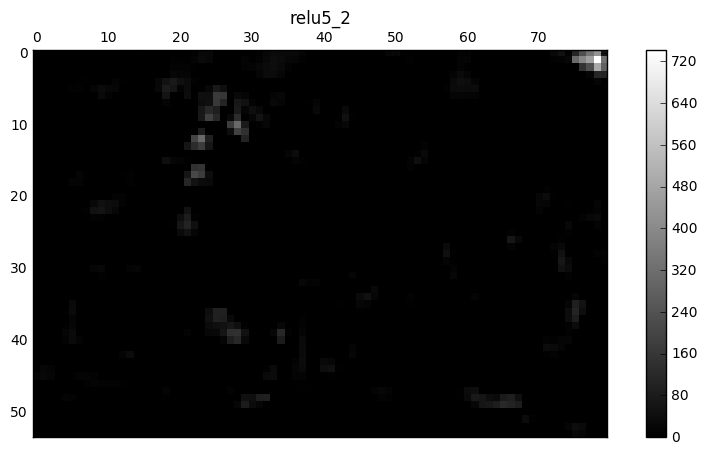

[33/36] conv5_3
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 54, 80, 512)


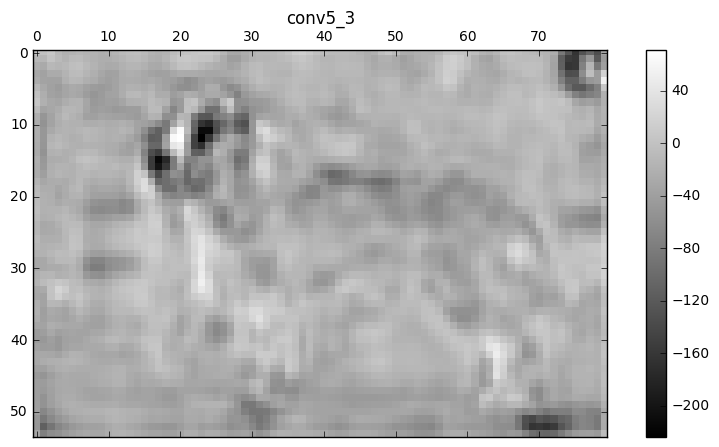

[34/36] relu5_3
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 54, 80, 512)


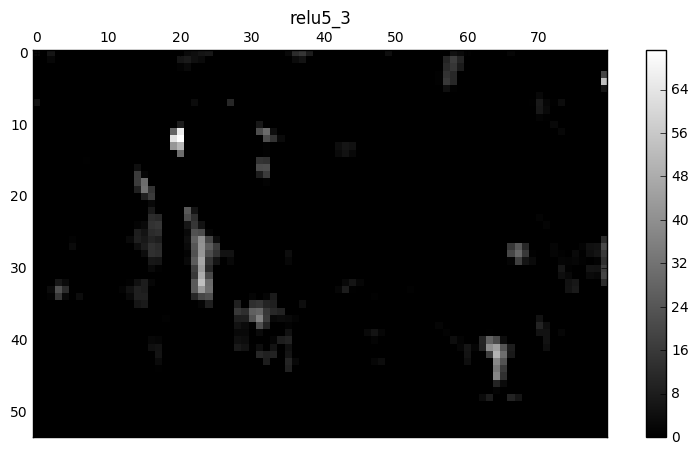

[35/36] conv5_4
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 54, 80, 512)


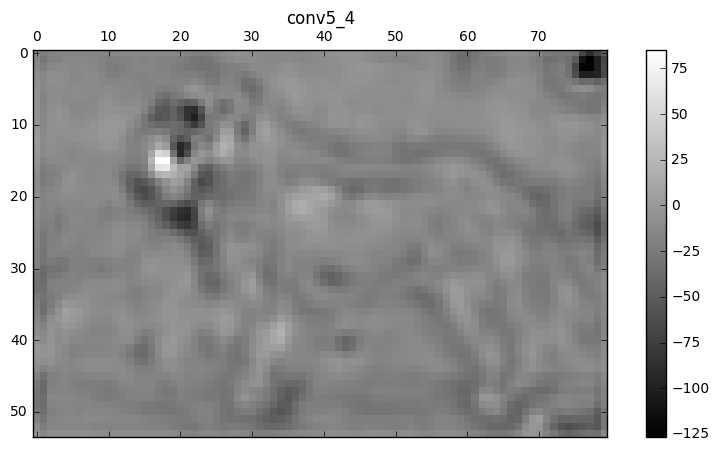

[36/36] relu5_4
 Type of features is  <class 'numpy.ndarray'>
 Shape of features is  (1, 54, 80, 512)


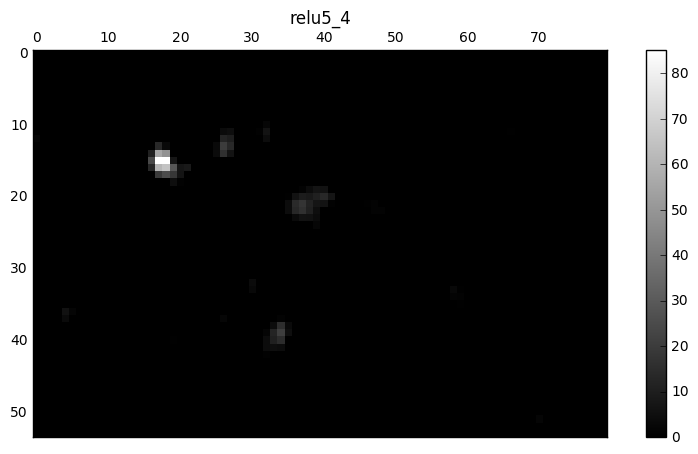

In [14]:
with tf.Graph().as_default(), tf.Session() as sess:
    image = tf.placeholder(dtype=tf.float32, shape=input_image_shape)
    nets, mean_pixel, all_layers = vgg_net(VGG_PATH, image)
    input_image_preprocess = np.array([preprocess(input_image, mean_pixel)])
    layers = all_layers # For all layers 

    for i, layer in enumerate(layers):
        print('[%d/%d] %s' % (i+1, len(layers), layer))
        features = nets[layer].eval(feed_dict={image: input_image_preprocess})
        
        print(' Type of features is ', type(features))
        print(' Shape of features is ', features.shape)
        # Plot response 
        if 1:
            plt.figure(i+1, figsize=(10, 5))
            plt.matshow(features[0, :, :, 0], cmap=plt.cm.gray, fignum=i+1)
            plt.title("" + layer)
            plt.colorbar()
            plt.show()